# Mining of large datasets project report

# Wine quality estimation

##### Project held by Grégoire Buisson and Margaux Nicolas

## Introduction

##### The main goal of this project is to determine if the quality of a wine can be determined thanks to its chemical characteristics. In order to answer this question, we will use the following dataset that we found on the UCI website:
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

##### The datasets contain 4898 wines and 11 chemical characteristics for each of them. In addition to that chemical information each wine has a quality grade. We will see later that all those 4898 observations can be used since they all are meaningful and none of them is incomplete.

##### To analyse and used those DATA we’ll use basics python libraries as well as some non standard libraries that can be installed with pip such as : imblearn or sklearn.

## Motivation

##### Both of us agreed on one thing, we like to taste and appreciate quality wine. And we would like to know in one sense how to recognize a good wine from its chemical qualities and in the other direction, from a wine that we have tasted, predict its characteristics. Furthermore, we thought a little further and thought that the reports we would draw up could also prove useful to restaurateurs and other traders. Some of them don’t have neither the ability nor the financial capacity to enrol someone to estimate the quality of a wine. This could be useful to follow the evolution of a wine over time, for example if you find a wine hidden in your cellar and wonder how good it still is, you could perhaps do it only using his chemical characteristics. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled. 

##### So know we have to find a way to estimate the wine quality based on his chemicals values. First of all a list of all available characteristics :

    • Fixed acidity : this refers to most acids involved with wine or fixed or nonvolatile (meaning that do not evaporate readily)
    • Volatile acidity : it is the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant vinegar taste
    • Citric acid : if it is found in small quantities, it can add ‘freshness’ and flavor to wines
    • Residual sugar : amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1gram/liter and wines with greater than 45 grams/liter are considered sweet
    • Chlorides : amount of salt in the wine
    • Free sulfur dioxide : exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
    • Total sulfur dioxide : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
    • Density : it is close to the density of water depending on the percent alcohol and sugar content
    • pH : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
    • Sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
    • Alcohol : percent alcohol content of the wine

##### And an additional feature that we will use to train our neural network : The quality. It is an output variable (based on sensory data, score between 0 and 10). The final goal is to determine this feature’s value using the others for a new wine.

## Imports

In [2]:
import pandas as pd # data processing
import numpy as np # linear algebra
import seaborn as sea # data graphics and visuals
import matplotlib.pyplot as plt # data graphics and visuals too
import tensorflow as tf
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Uploading the data

In [3]:
# csv file name
filename = "Wine_data.csv"

# dataframe initialisation
wine_df = pd.read_csv(filename, encoding = 'ISO-8859-1')

# show the first 5 rows of the dataset
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

## Distribution of wines by variables

### Quality

In [6]:
wine_df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

## Handling missing data

##### After downloading the database, we didn't know if it would be directly usable, meaning if there are rows that contained NULL values. So we’ve checked that first. As a result, none of our data is corrupted or missing some of the features so we don’t have to remove any of them. Moreover, fortunately all of ours parameters are integers so we can use them directly and no need to transform them in a different shape.

In [7]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Since the value on which we will focus our interest is the quality we have to analyse deeper how the data are distributed in relation to quality.

In [9]:
# change the 'quality' variable from integer to object
wine_df['quality'] = wine_df['quality'].astype(object)

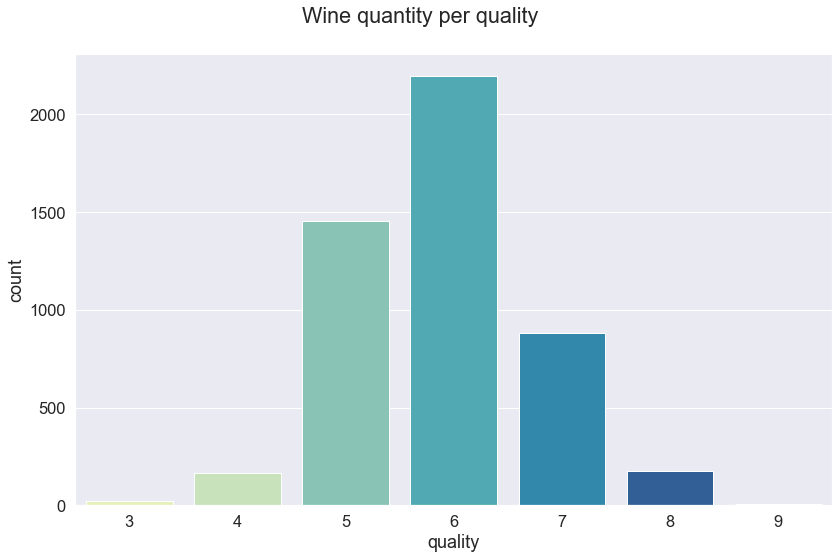

In [10]:
plt.figure(figsize = (12,8))
sea.set(font_scale = 1.5)

sea.countplot(data = wine_df, x = 'quality', palette = 'YlGnBu')

plt.suptitle('Wine quantity per quality')
plt.tight_layout()


#### We can see that the range of quality ratings ranges from 3 to 9 with a large majority of wines qualified with grades 5, 6 and 7.

#### We'll see later that one of our classification models is based on the use of neighbors. We decided to use a number of neighbors higher than five, thus we couldn't keep the data with quality 9 since the database only contains five of them.

In [33]:
index_qualities = wine_df[wine_df['quality'] == 9 ].index


In [12]:
wine_df.drop(index_qualities, inplace = True)

In [13]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4893.000000       4893.000000  4893.000000     4893.000000   
mean        6.854210          0.278221     0.334139        6.393736   
std         0.843637          0.100831     0.121048        5.072990   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  4893.000000          4893.000000           4893.000000  4893.00000   
mean      0.045791            35.310035            138.383507     0.99403   
std       0.021850            17.011384             42.509982     0.00299   
min       0.009000             2.000000              9.000000     0.98711   
25%       0.036000            23.000000            108.000000     0.99173   
50%       0.043000            34.000000            134.000000     0.99375   
75%       0.050000            46.000000            167.000000     0.99610   
max       0.346000           289.000000            440.000000     1.03898   

                pH    sulphates      alcohol  
count  4893.000000  4893.000000  4893.000000  
mean      3.188144     0.489871    10.512565  
std       0.151011     0.114151     1.229755  
min       2.720000     0.220000     8.000000  
25%       3.090000     0.410000     9.500000  
50%       3.180000     0.470000    10.400000  
75%       3.280000     0.550000    11.400000  
max       3.820000     1.080000    14.200000

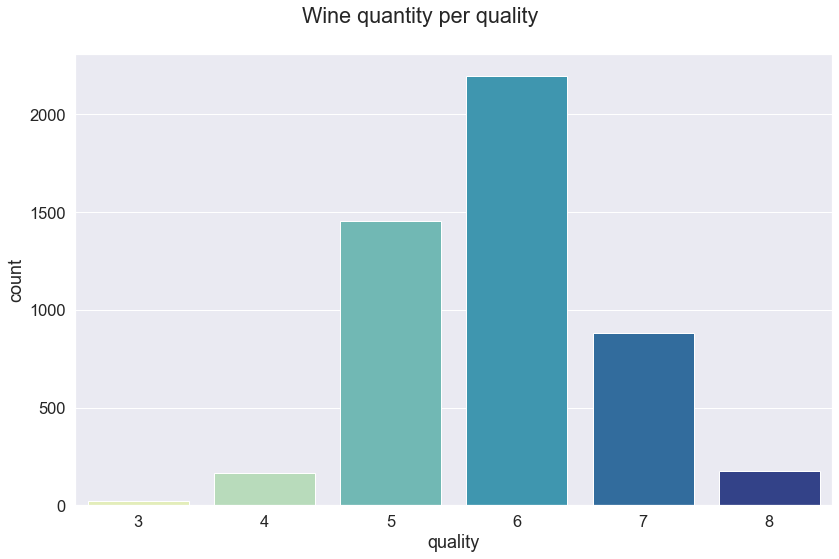

In [14]:
plt.figure(figsize = (12,8))
sea.set(font_scale = 1.5)

sea.countplot(data = wine_df, x = 'quality', palette = 'YlGnBu')

plt.suptitle('Wine quantity per quality')
plt.tight_layout()

#### The wines of quality equal to 9 have been withdrawn

## Quantitative data distributions

###### °We first notice that most of the measures in this dataset have positive asymmetric distributions (i.e. most of the values are grouped around the left tail of the distribution while the right tail of the distribution is longer)

###### °The density and pH variables have roughly normal distributions, while the volatile acidity and sulphate distributions are slightly positive asymmetric.

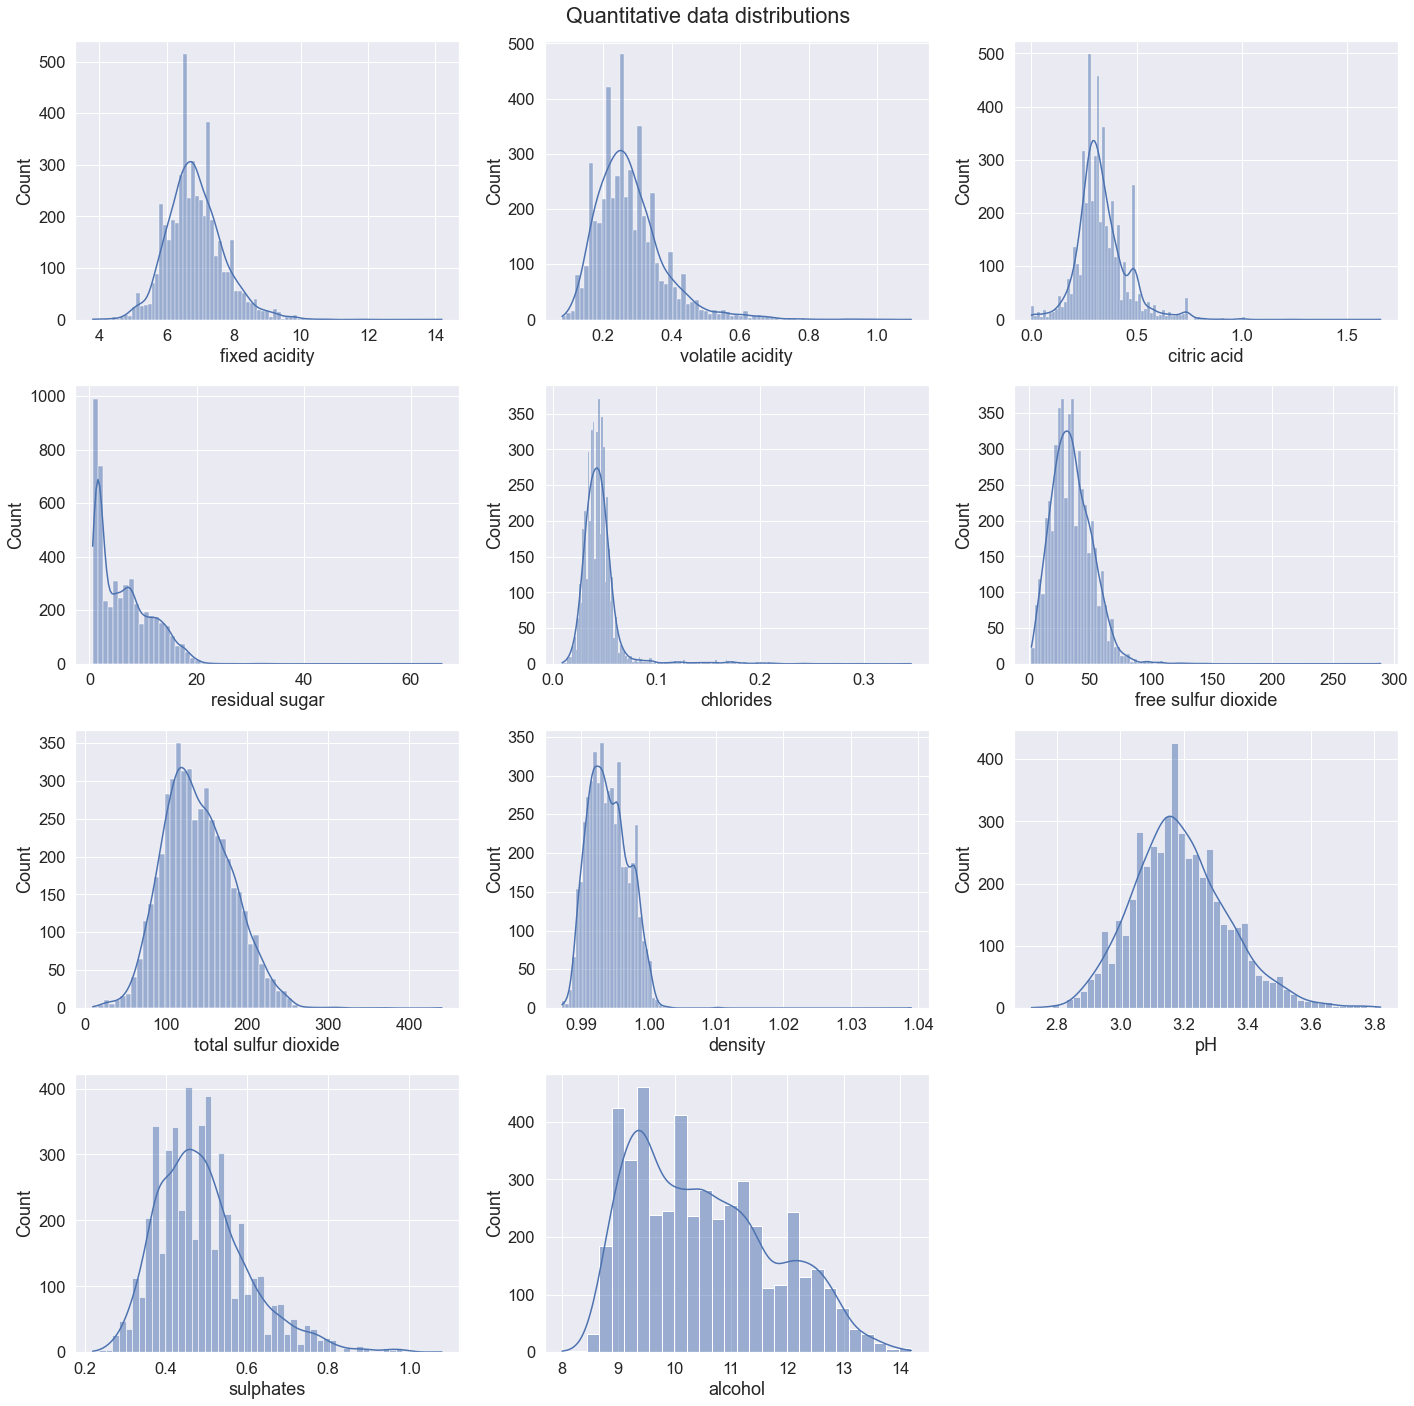

In [15]:
plt.figure(figsize=(20,20))
sea.set(font_scale = 1.5)

for i, col in enumerate(wine_df.select_dtypes(include=['float64']).columns) :
    ax = plt.subplot(4,3, i+1)
    sea.histplot(x = wine_df[col], ax=ax, kde = True)
    
plt.suptitle('Quantitative data distributions')
plt.tight_layout()

## Large correlation matrix

###### The correlation coefficient is a number between -1.0 and 1.0, a strong correlation relationship between two variables corresponds to a number close to -1.0 or 1.0, while the closer the number is to 0, the weaker the correlation between the two variables is.

###### The sign of the correlation coefficient corresponds to the direction of the relationship between two variables

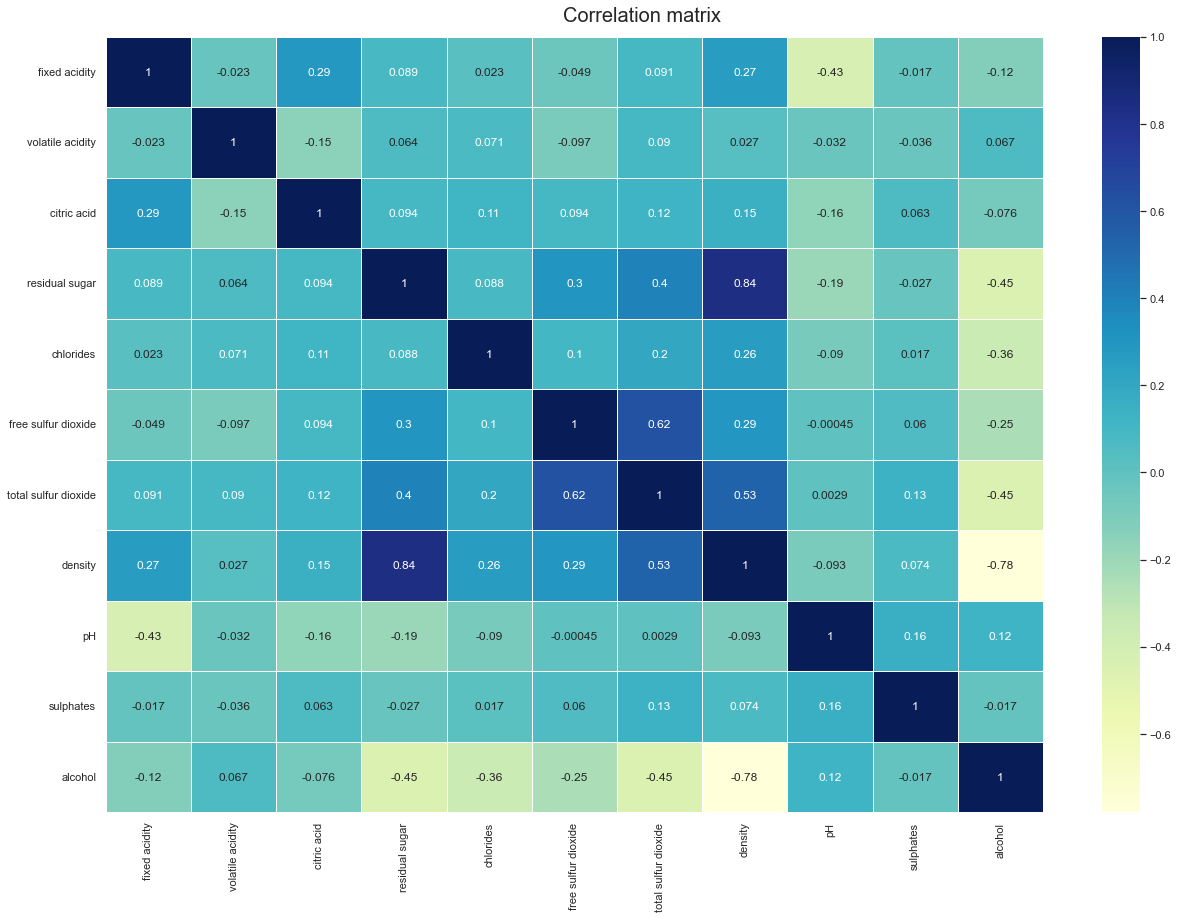

In [17]:
plt.subplots(figsize = (18,13))
sea.set(font_scale = 1)

hmap = sea.heatmap(data = wine_df.corr(),
                  annot = True,
                  linewidths = .5,
                  cmap = "YlGnBu"
                  )

plt.suptitle("Correlation matrix", fontsize = 20)
plt.tight_layout()

## Finding the most relevant features

##### First of all we compute the heatmap of correlation between all or features in order to determine which of the chemical features are the most correlated with the quality.

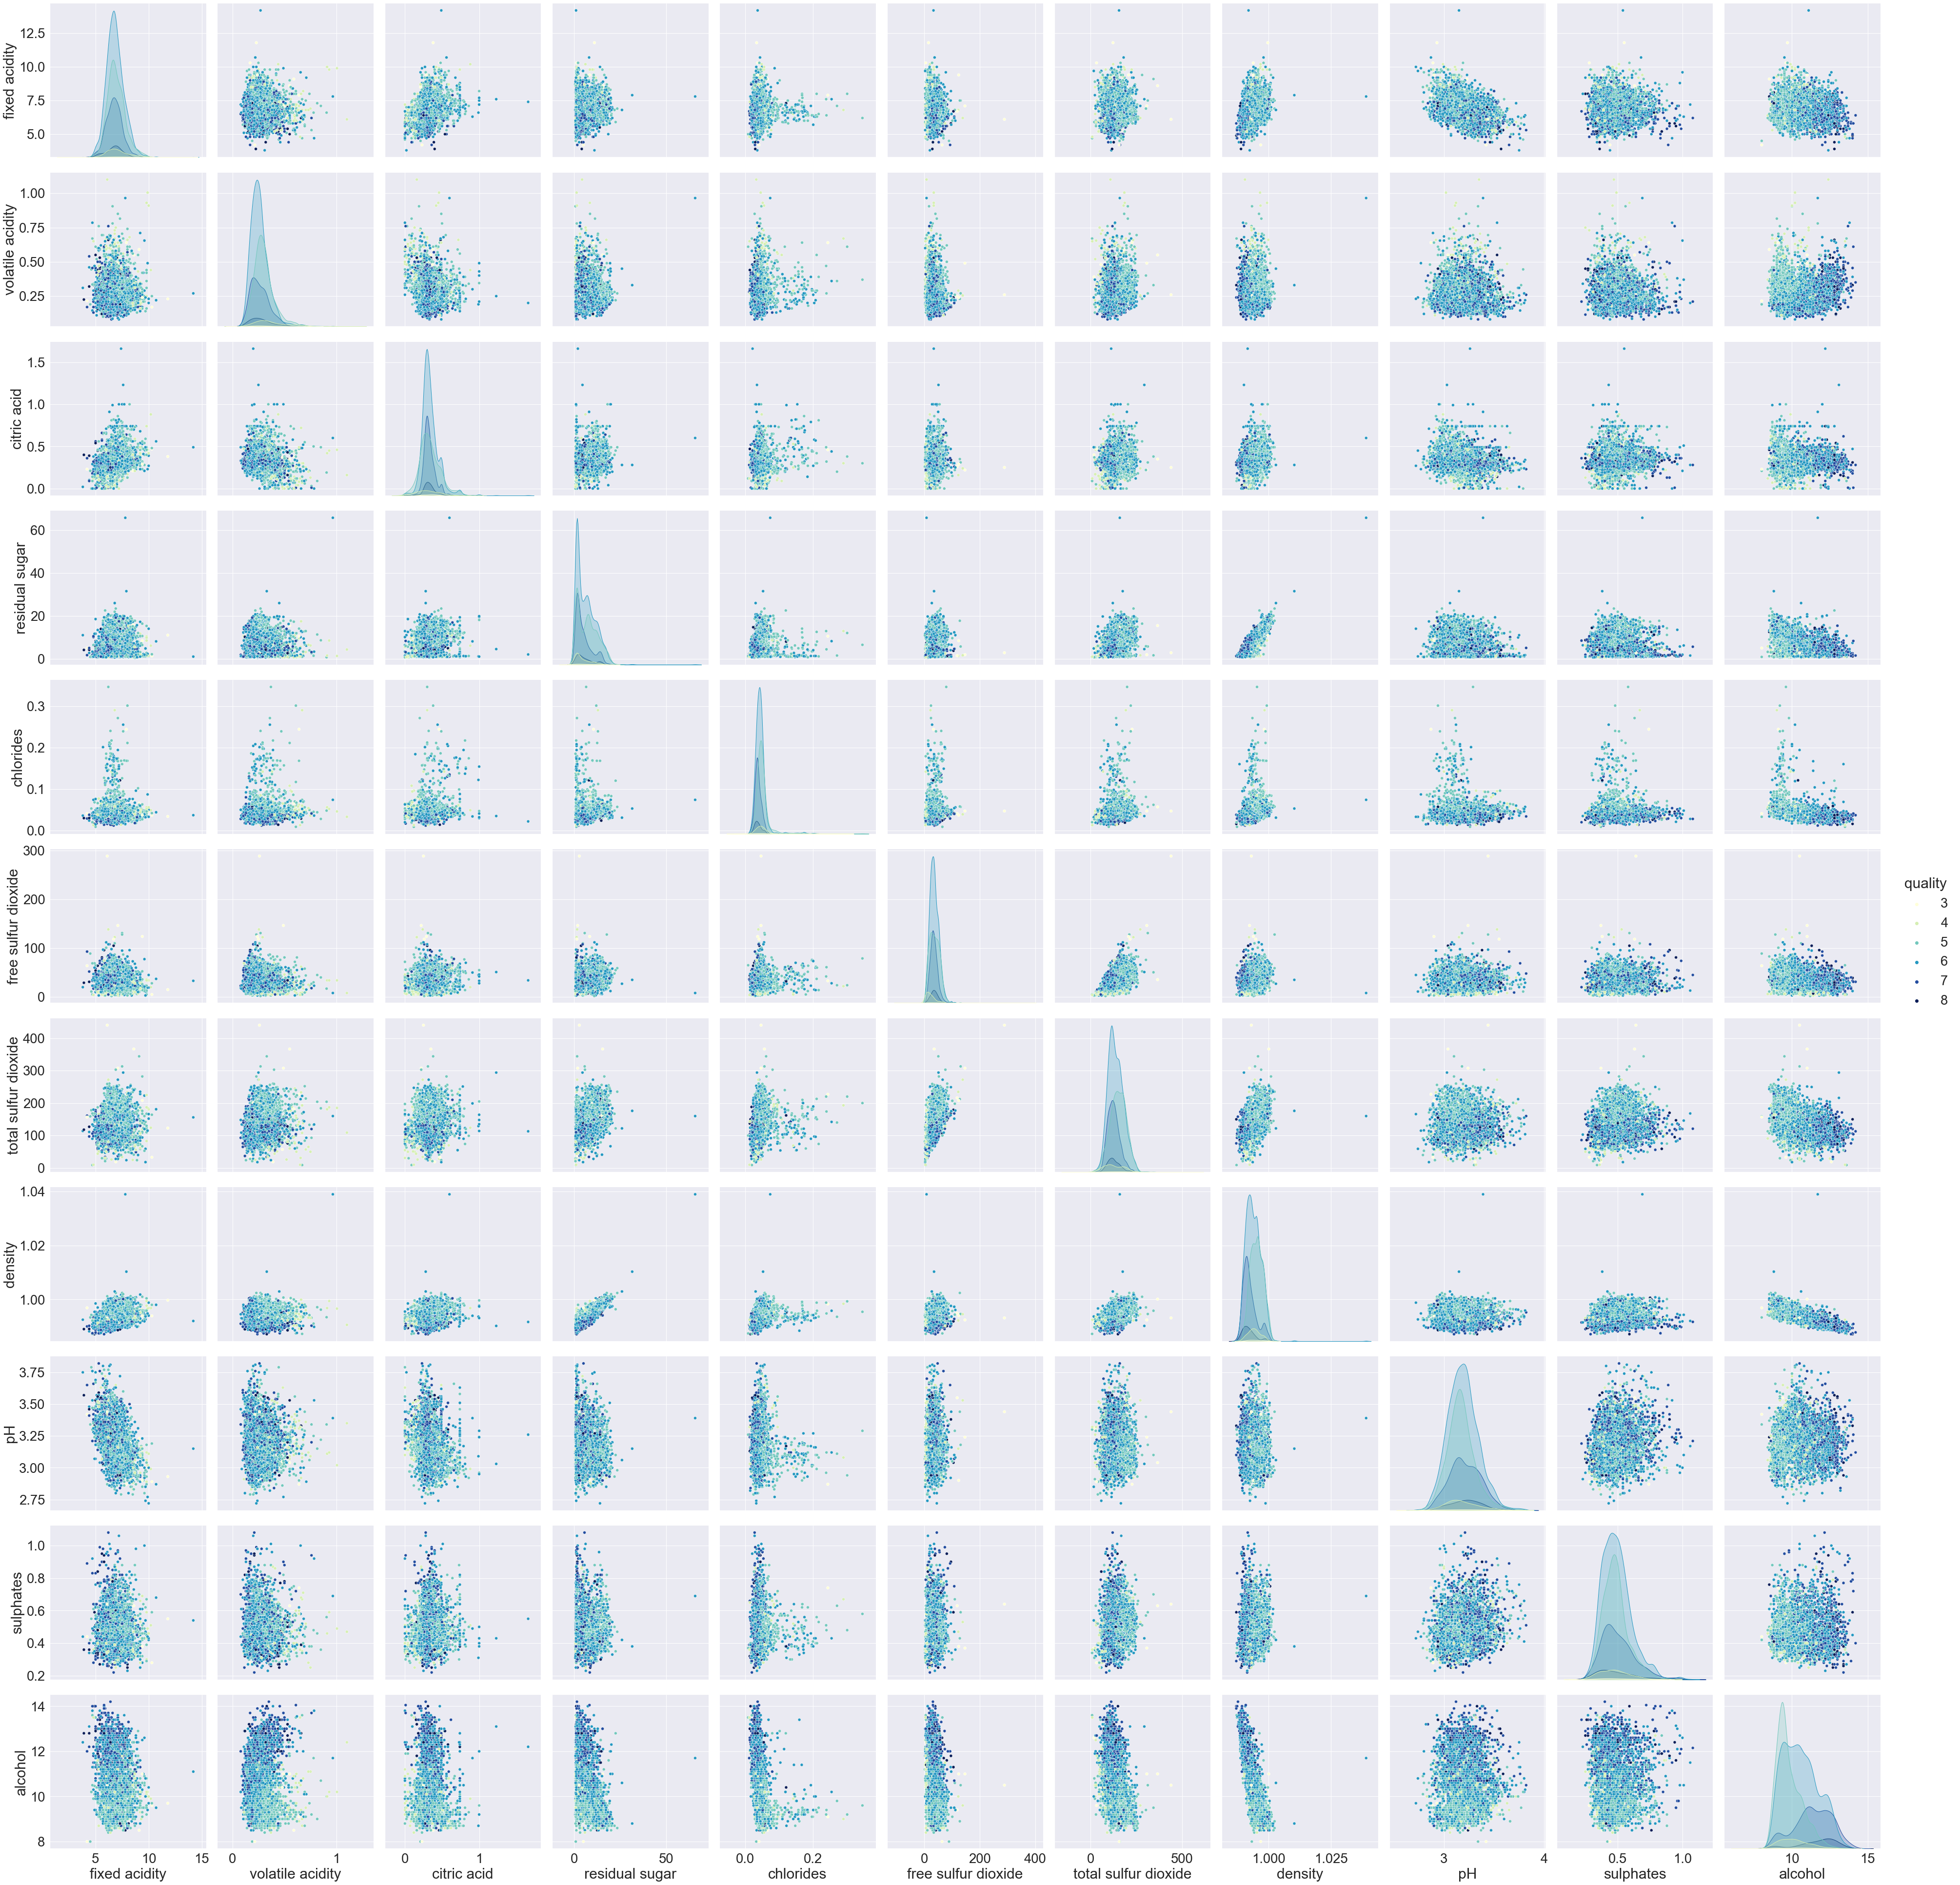

In [18]:
sea.set(font_scale = 2.5)

sea.pairplot(wine_df,
             hue="quality",
             height= 5,
             palette = "YlGnBu")

##### In the Pairplot above, darker color indicates a higher quality, as indicated by the legend to the right.

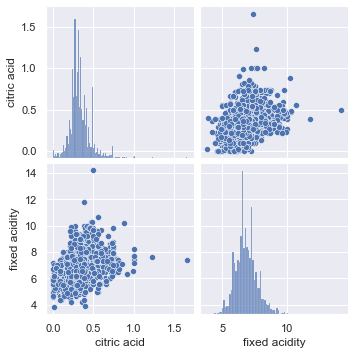

In [19]:
sea.set(font_scale = 1.0)

sea.pairplot(wine_df[['citric acid','fixed acidity']])

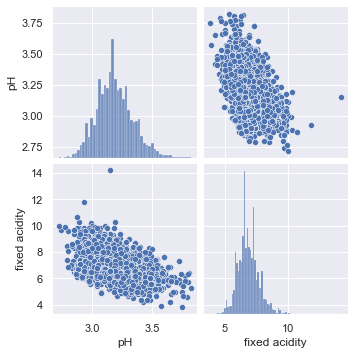

In [20]:
sea.set(font_scale = 1.0)

sea.pairplot(wine_df[['pH','fixed acidity']])

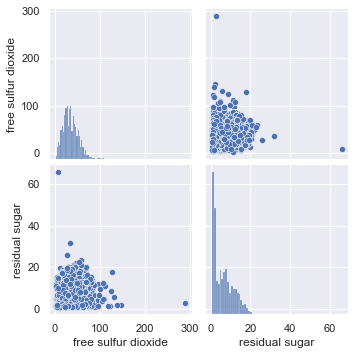

In [21]:
sea.set(font_scale = 1.0)

sea.pairplot(wine_df[['free sulfur dioxide','residual sugar']])

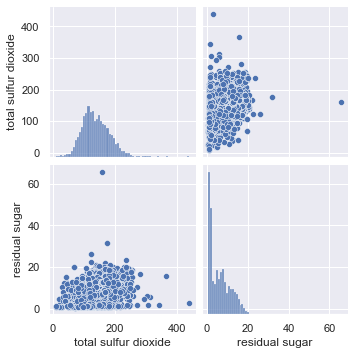

In [22]:
sea.set(font_scale = 1.0)

sea.pairplot(wine_df[['total sulfur dioxide','residual sugar']])

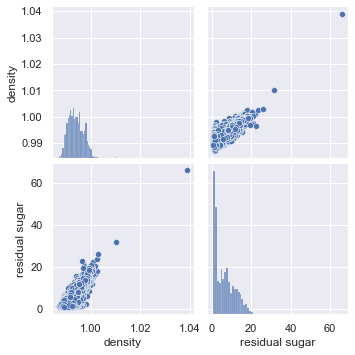

In [23]:
sea.set(font_scale = 1.0)

sea.pairplot(wine_df[['density','residual sugar']])

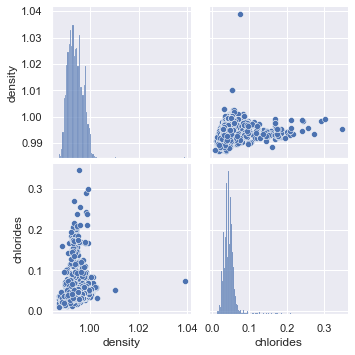

In [24]:
sea.set(font_scale = 1.0)

sea.pairplot(wine_df[['density','chlorides']])

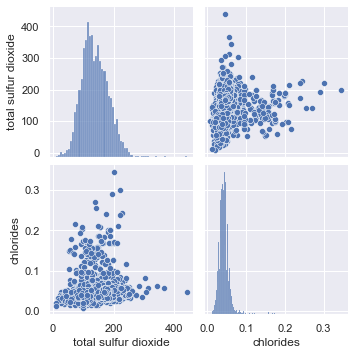

In [25]:
sea.set(font_scale = 1.0)

sea.pairplot(wine_df[['total sulfur dioxide','chlorides']])

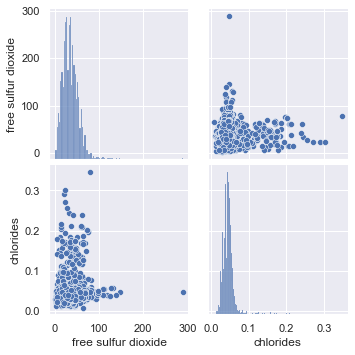

In [26]:
sea.set(font_scale = 1.0)

sea.pairplot(wine_df[['free sulfur dioxide','chlorides']])

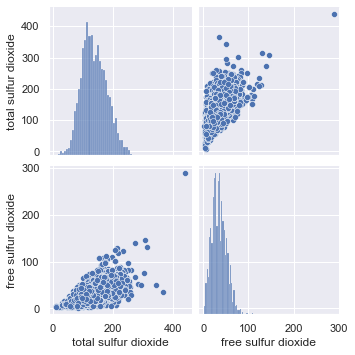

In [27]:
sea.set(font_scale = 1.0)

sea.pairplot(wine_df[['total sulfur dioxide','free sulfur dioxide']])

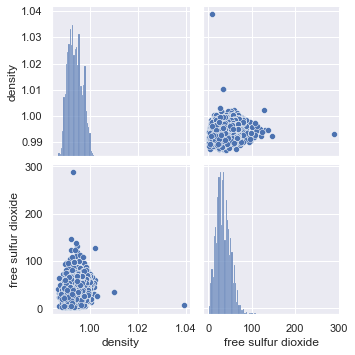

In [28]:
sea.set(font_scale = 1.0)

sea.pairplot(wine_df[['density','free sulfur dioxide']])

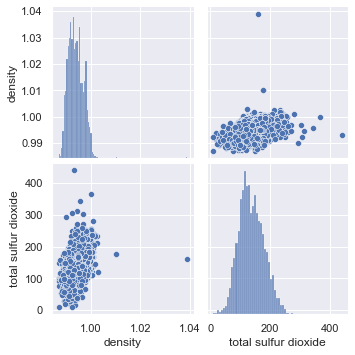

In [30]:
sea.set(font_scale = 1.0)

sea.pairplot(wine_df[['density','total sulfur dioxide']])

##### The most impressive correlation with quality we obtain are free sulfur dioxide and residual sugar. 

## Distributions of quantitative variables with respect to quality

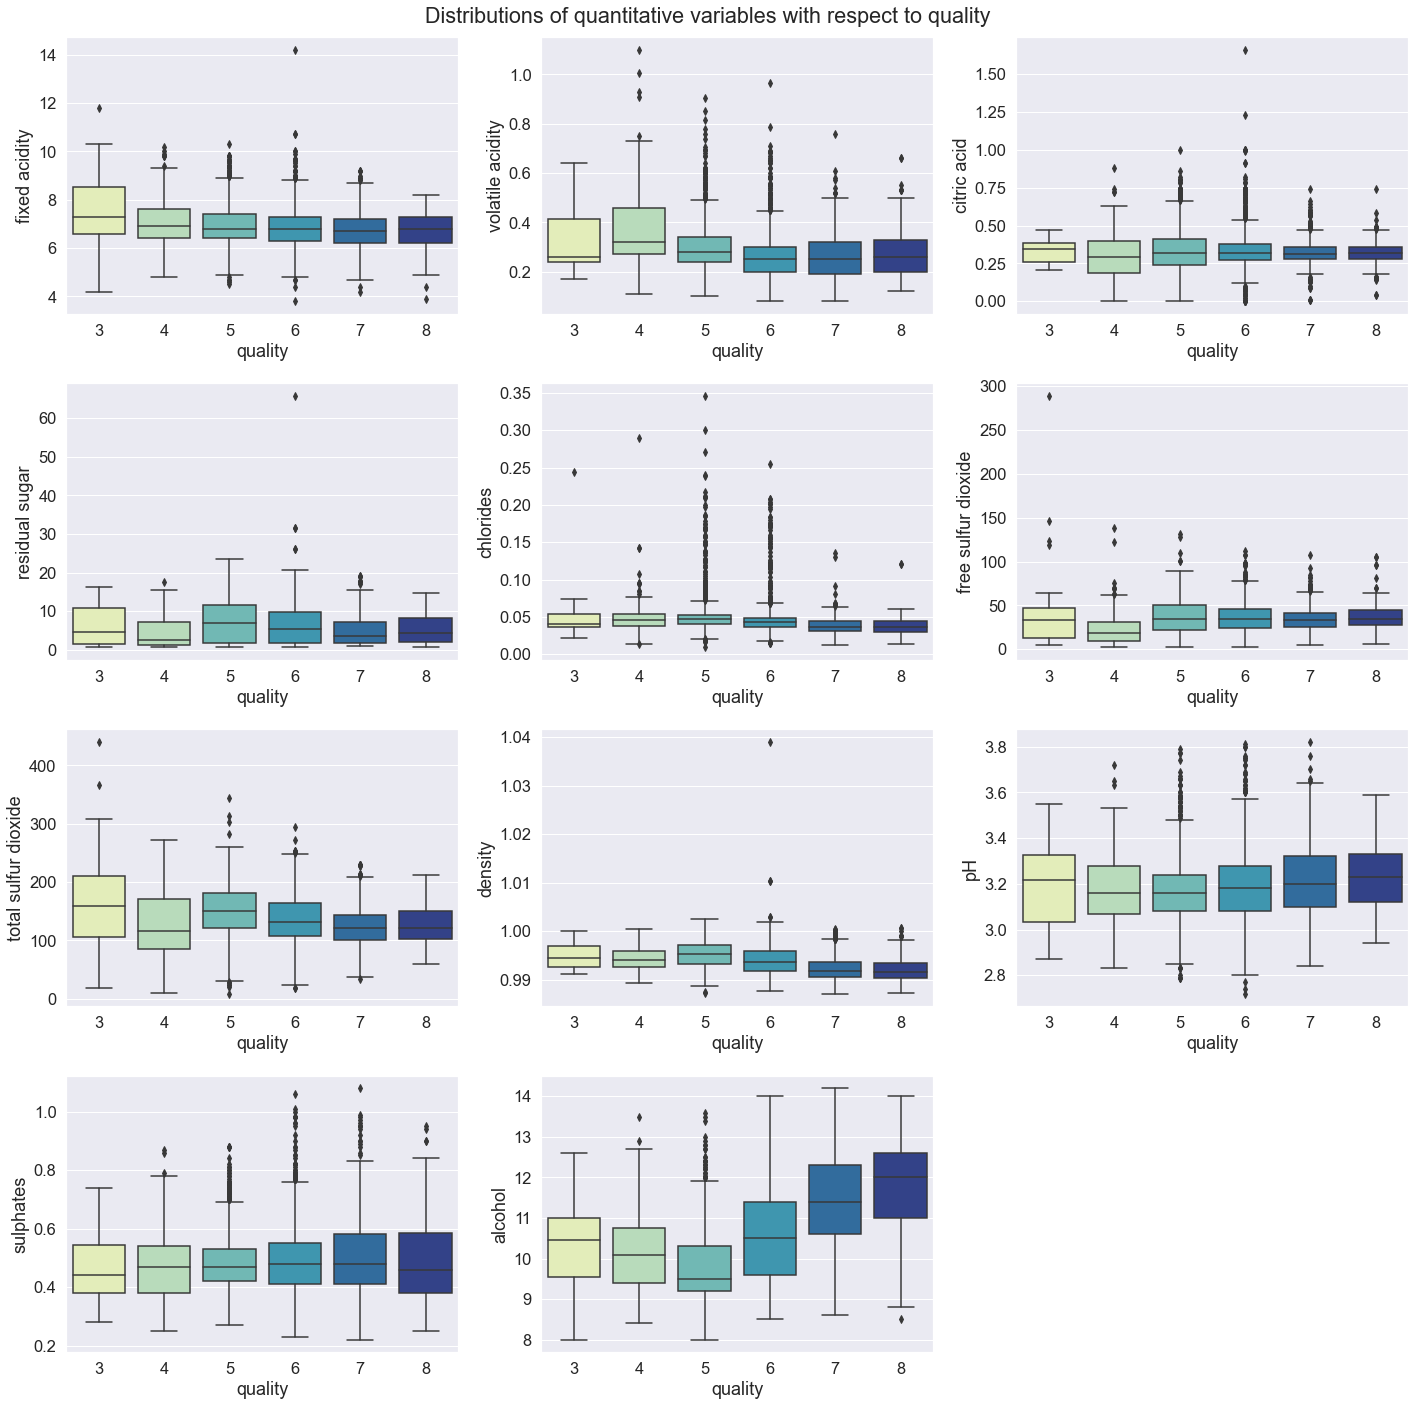

In [31]:
plt.figure(figsize = (20,20))
sea.set(font_scale = 1.5)

for i, col in enumerate(wine_df.select_dtypes(include = ['float']).columns) :
    ax = plt.subplot(4,3, i+1)
    sea.boxplot(data = wine_df, x = 'quality', y = col, ax = ax, palette = 'YlGnBu')
    
plt.suptitle('Distributions of quantitative variables with respect to quality')
plt.tight_layout()

##### Higher 'citric acid', 'alcohol', 'sulphates', or 'fixed acidity' correlate with a higher quality score.

##### On the other hand, a higher 'density', 'pH', or 'volatile acidity' may correlate with lower quality.

##### 'Chlorides' and 'residual sugar' may not have much of an impact on the quality of a wine.

## Correlation coefficients of the target variables

In [32]:
wine_df['quality'] = wine_df['quality'].astype('int') #We put the variable quality in int and more in object to calculate the different correlation coefficients

corr = wine_df.corr() 

print(corr['quality'].sort_values(ascending = False))

quality                 1.000000
alcohol                 0.433986
pH                      0.097233
sulphates               0.054796
free sulfur dioxide     0.008619
citric acid            -0.010824
residual sugar         -0.096610
fixed acidity          -0.116912
total sulfur dioxide   -0.173990
volatile acidity       -0.196712
chlorides              -0.208316
density                -0.306231
Name: quality, dtype: float64


###### Volatile alcohol and acidity are the variables that have the most impact on the quality of a wine while residual sugar has the least

### Different kind of tests

### Feed-forward neural network

#### Features reduction

##### Using random forrest to analyse the feature importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=12)
x = wine_df.drop(['quality'] , axis = 1)
wd = pd.get_dummies(wine_df)
model.fit(x, wine_df.quality)
display(model.feature_importances_)

array([0.05261081, 0.13576775, 0.05118569, 0.06399004, 0.05590089,
       0.11993655, 0.06114503, 0.05480489, 0.06393526, 0.05432602,
       0.28639706])

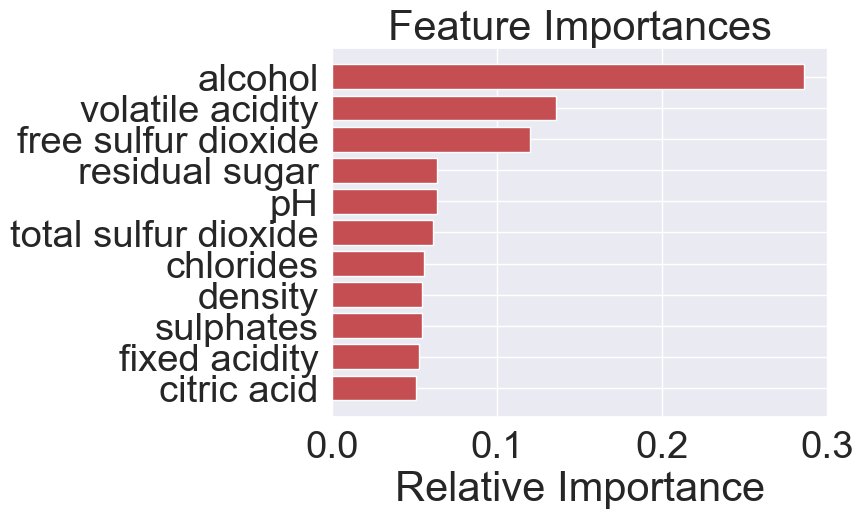

In [24]:
features = wd.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### Removing the least important feature according to the random forrest results

In [25]:
del x['sulphates']
del x['density']
del x['citric acid']

##### Encoding the quality

In [26]:
le = LabelEncoder()
y = le.fit_transform(wine_df.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

##### Data Over Sampling using SMOTE

In [27]:
from imblearn.over_sampling import SMOTE


In [28]:
strategy = {0:2200, 1:2200, 2:2200, 3:2200, 4:2200, 5:2200}
oversample = SMOTE(sampling_strategy=strategy)
x, y = oversample.fit_resample(x, y)

d:\program files (x86)\nouveau dossier (3)\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (2200) in class 0 will be larger than the number of samples in the majority class (class #3 -> 2198)
  warnings.warn(
d:\program files (x86)\nouveau dossier (3)\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (2200) in class 1 will be larger than the number of samples in the majority class (class #3 -> 2198)
  warnings.warn(
d:\program files (x86)\nouveau dossier (3)\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (2200) in class 2 will be larger than the number of samples in the majority class (class #3 -> 2198)
  warnings.warn(
d:\program files (x86)\nouveau dossier (3)\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (2200) in class 3 will be larger than 

In [29]:
x.shape

(13200, 8)

##### Spliting data

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [31]:
print(y_train)

       0
3037   3
12523  5
7730   1
8379   1
3005   2
...   ..
13123  5
3264   2
9845   2
10799  4
2732   4

[10560 rows x 1 columns]


##### Transforming quality to categorical data

In [32]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 7)
y_test_cat = tf.keras.utils.to_categorical(y_test, 7)

##### Scaling Features

In [33]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### Machine Learning Modeling

##### Artificial neural network

In [34]:
ann = tf.keras.models.Sequential(layers = None , name = None)
ann.add(tf.keras.layers.Input(shape = 8,))
ann.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 7 , activation = "sigmoid"))
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 7)                 63        
                                                                 
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [35]:
ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])

In [36]:
history = ann.fit(x_train, y_train_cat,  batch_size= 32, epochs = 200 , validation_data = (x_test,y_test_cat))

Epoch 1/200
330/330 [==============================] - 4s 4ms/step - loss: 1.6733 - accuracy: 0.3199 - val_loss: 1.4856 - val_accuracy: 0.3705
Epoch 2/200
198/330 [=================>............] - ETA: 0s - loss: 1.4147 - accuracy: 0.4094

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model 1')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

### KNeighborsclassfier

The K-Nearest Neighbors classification algorithm takes a data point and selects the nearest K number of observations in the training data.Then it predicts the response of the data point regarding the most popular response value from the K-nearest neighbors.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

So we decided to plot a graph representing the accuracy depending on the k value

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
# It’s 10 fold cross validation with ‘accuracy’ scoring 
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
    %matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [ ]:
# Train the model and predict for k=19
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
# classification report for test set
print(classification_report(y_test, y_pred, digits=3, zero_division = 1))
# Calculate cv score with 'accuracy' scoring and 10 folds
accuracy = cross_val_score(knn, x, y, scoring = 'accuracy',cv=10)
print('cross validation score',accuracy.mean())
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(knn, x, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,knn.predict_proba(x_test), multi_class='ovr'))

As we can see the accuracy of this model is under 0.5 so it's not a good way to predict our results.

### Logistic Regression

Logistic regression is used classicly in problems with binary answers. But in our case we are going to adapt it so we can use it with 6 differents output which are the quality grade.

In [ ]:

# import module
from sklearn.linear_model import LogisticRegression
# Train and fit model
logreg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
logreg.fit(x_train, y_train)
# Predict out-of-sample test set
y_pred = logreg.predict(x_test)
# classification report
print(classification_report(y_test, y_pred, digits=3, zero_division = 1))
print('accuracy',accuracy_score(y_test, y_pred))
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(logreg, x, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,logreg.predict_proba(x_test), multi_class='ovr'))

in this model both accuracy and scores are less good than the K neigbors one. So we won't this test if we want to predict the quality  of a wine.

Because of it we will try to improve our model by adding a third degree polynome to our regression. 

### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Add polynomial features to the logistic regression model
def PolynomialRegression(degree=2, **kwargs):
 return make_pipeline(PolynomialFeatures(degree),
 LogisticRegression(multi_class='multinomial',solver ='newton-cg', **kwargs))

In [ ]:
# Train and fit the 3rd degree polynomial regression model
poly = PolynomialRegression(3)
poly.fit(x_train,y_train)
# Test out-of-sample test set
y_pred = poly.predict(x_test)
# Classification report
print(classification_report(y_test, y_pred, digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(poly, x, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,poly.predict_proba(x_test), multi_class='ovr'))

As we can see adding this 3rd degree polynome to our regression improves a lot the result which is way closer to 1 for both accuracy and scores.

### Decision Tree

Decision trees are one of the most popularly used classification algorithms in the data science field. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Train and fit the Decision Tree Classification model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
# Evaluate the model with out-of-sample test set
y_pred = tree.predict(x_test)
# Classification report
print(classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(tree, x, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,tree.predict_proba(x_test), multi_class='ovr'))

When we applied it to our dataset, there is an increase in recall results but the cross validation score decreased compared to the 3rd degree regressoin one.

### Random Forest

Random forest is a method base on multiple decision trees and then gets a prediction based on what the majority of decision trees predict.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train and fit the Random Forest Classification model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
forest.fit(x_train, y_train)
# Test out-of-sample test set
y_pred = forest.predict(x_test)
# Classification report
print(classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, x, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(x_test), multi_class='ovr'))

As we can see this method improve the results from the decision tree one and give us the best results so far.

### Ada Boost

Adaboostclassifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
abc= AdaBoostClassifier(random_state=1)
abc.fit(x_train,y_train)

In [ ]:
predictions=abc.predict(x_test)
print(accuracy_score(y_test,predictions))

As we can see in our case the adaboost classifier gives us quite bad results. We don't want to use it.

### LDA (linear-discriminant analysis)

A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [40]:
# fitting the LDA model
lda = LDA(n_components=2)
lda_X = lda.fit(x,y).transform(x)

d:\program files (x86)\nouveau dossier (3)\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
index_qualities=[]
for i in range (6):
  index_qualities_inter = wine_df[wine_df['quality'] == i+3 ].index
  index_qualities.append(index_qualities_inter)
colors=['orange','yellow','green','red','blue','pink']

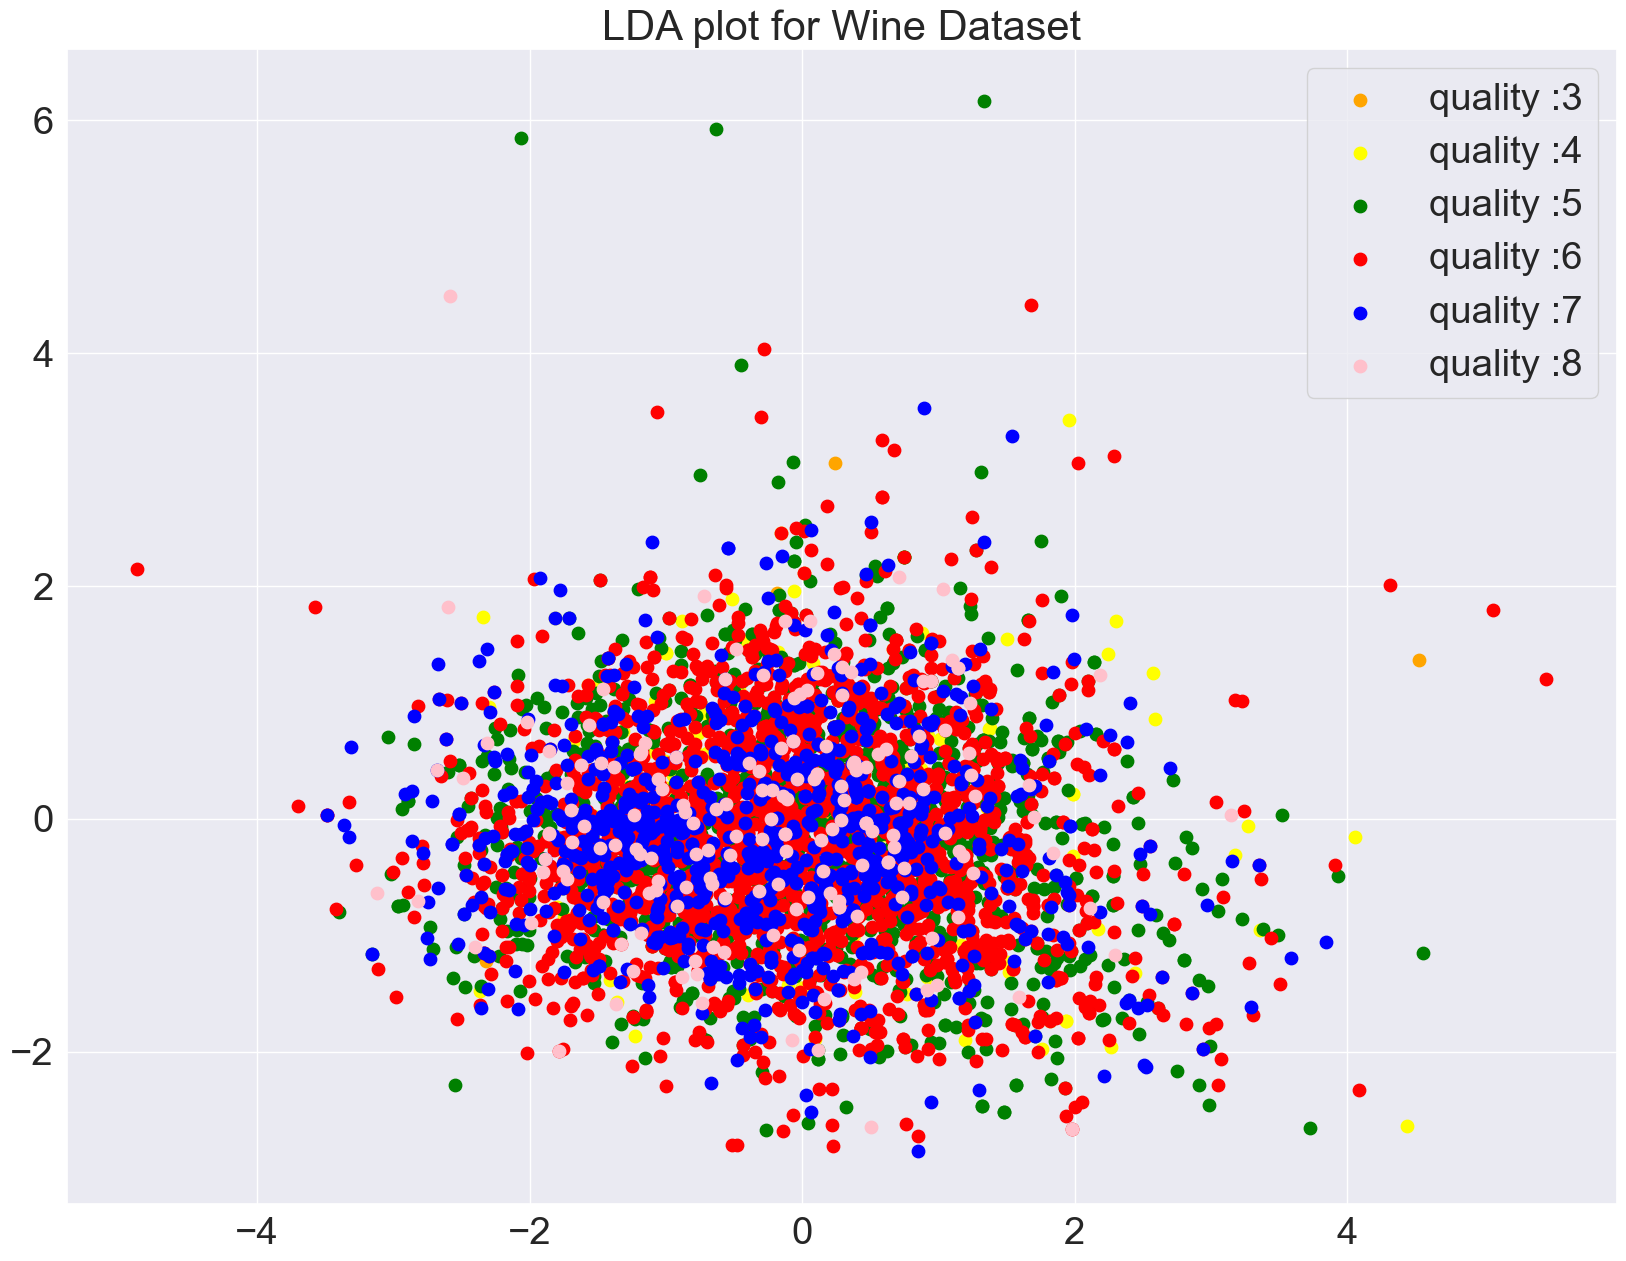

In [47]:
plt.figure(figsize=(20,15))
for t in range (6):
    #to create the label
    plt.scatter(lda_X[0, 0], lda_X[0, 1], s =80, c = colors[t], label='quality :'+ str(t +3))
    for i in index_qualities[t]:
        plt.scatter(lda_X[i, 0], lda_X[i, 1], s =80, c = colors[t])
plt.title('LDA plot for Wine Dataset')
plt.legend()

We can see quite a difference between the repartition of wines based on quality. The more the quality is high the more aggregate are the datas.

### Confusion Matrice

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
classifier = SVC()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

To conclude the most accurate classification model seems to be the polynomial regression. So if we had to implement our idea in real circumstances we will use this one to predict a wine quality.